In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("Covid_Data_multiple_linear _regression.csv")
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [3]:
print("The X values: ",X)
print()
print("The y values: ", y)

The X values:  [[10 'Moderate' 0 97]
 [80 'High' 0 92]
 [10 'Low' 0 97]
 [81 'High' 4 75]
 [12 'Moderate' 0 97]
 [18 'Low' 0 66]
 [13 'Moderate' 0 93]
 [94 'High' 4 64]
 [86 'High' 2 76]
 [20 'Moderate' 0 92]
 [15 'Moderate' 0 94]
 [15 'Moderate' 0 92]
 [16 'Low' 0 92]
 [17 'Moderate' 0 93]
 [18 'Moderate' 0 93]
 [19 'Moderate' 0 92]
 [19 'Moderate' 0 89]
 [12 'Moderate' 0 97]
 [20 'Moderate' 0 93]
 [24 'Moderate' 0 92]
 [25 'Moderate' 0 93]
 [59 'High' 2 68]
 [63 'High' 1 66]
 [25 'Moderate' 1 62]
 [26 'High' 0 94]
 [26 'Low' 0 97]
 [28 'Moderate' 0 99]
 [59 'High' 0 69]
 [28 'Moderate' 0 89]
 [29 'Moderate' 0 93]
 [48 'Moderate' 0 93]
 [30 'Moderate' 0 62]
 [30 'Moderate' 0 86]
 [32 'Moderate' 0 84]
 [34 'Moderate' 1 90]
 [35 'Moderate' 0 89]
 [50 'High' 2 77]
 [56 'High' 2 76]
 [56 'High' 1 77]
 [36 'High' 1 90]
 [38 'High' 2 75]
 [40 'Moderate' 0 90]
 [40 'High' 0 92]
 [61 'High' 2 76]
 [42 'High' 0 92]
 [46 'High' 0 91]
 [49 'Moderate' 0 80]
 [52 'High' 1 80]
 [32 'Moderate' 0 89]

In [4]:
data_set.isnull().sum()

age                             0
Body Temp                       0
Chronic disease                 0
Blood O2 Level in Percentage    0
Anti Bodies                     0
dtype: int64

In [5]:
#Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

In [56]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

In [57]:
# Applying multiple Linear regression.
from sklearn.linear_model import LinearRegression

In [58]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [59]:
# Reshaping the data into (|y_predict| y_test|)columns
y_predict = regressor.predict(X_test) 
np.set_printoptions(precision=3) # Setting precision =3 decimal places for y_predict values.
print(y_predict)

[ 98523.191  65402.264  91633.957  59006.199  83371.86   37389.494
  30993.428  61449.821  88243.989  44653.711  60509.248  94138.001
  81045.966  87382.408  89441.362  73918.161  45028.695  64830.56
  62066.945 107662.326  49277.928  66394.372 110895.003  76026.676
 103591.699  43955.278  61761.269  83187.824]


In [63]:
print(np.concatenate((y_predict.reshape(len(y_predict),1), y_test.reshape(len(y_test),1)),1)) # The 1 as the second argument to 
#concatenate specifies that the concatenation 
#should be done horizontally (column-wise). So, it creates a new array where the y_predict and 
#y_test values are stacked side by side in two columns.

[[ 98523.191  93010.   ]
 [ 65402.264  66019.   ]
 [ 91633.957  91019.   ]
 [ 59006.199  59994.   ]
 [ 83371.86   83891.   ]
 [ 37389.494  46016.   ]
 [ 30993.428  37914.   ]
 [ 61449.821  62001.   ]
 [ 88243.989  90001.   ]
 [ 44653.711  42099.   ]
 [ 60509.248  61018.   ]
 [ 94138.001  93091.   ]
 [ 81045.966  75012.   ]
 [ 87382.408  88012.   ]
 [ 89441.362  90015.   ]
 [ 73918.161  71191.   ]
 [ 45028.695  42010.   ]
 [ 64830.56   67019.   ]
 [ 62066.945  62019.   ]
 [107662.326 110911.   ]
 [ 49277.928  39010.   ]
 [ 66394.372  61082.   ]
 [110895.003 111911.   ]
 [ 76026.676  78004.   ]
 [103591.699 102019.   ]
 [ 43955.278  39010.   ]
 [ 61761.269  62019.   ]
 [ 83187.824  84008.   ]]


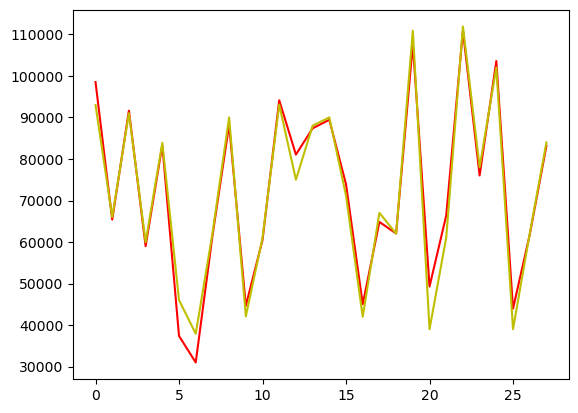

In [66]:
plt.plot(y_predict,'r')
plt.plot(y_test,'y')
plt.show()